<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt

In [3]:
def get_higher_10(df, c):
    q9 = df[c].quantile(0.9)
    return df[df[c] >= q9][c].tolist()[:40]

In [7]:
folder_save = 'predicted_data/'

dict_datasets = {}

for folder in os.listdir(folder_save):
    #print(folder)
    methods = []
    scores = []
    for file in os.listdir(folder_save + folder):
        gen_method = file.replace(".csv", "")
        #print(" " * 8, gen_method)
        df = pd.read_csv(folder_save + folder + '/' + file)
        methods.extend([gen_method]*40)
        #print(df.shape)
        scores.extend(get_higher_10(df, 'score-svm'))

    
    
    df = pd.DataFrame()
    df['SVM-score'] = scores
    df['Generative method'] = methods
    dict_datasets[folder] = df

In [49]:
METHODS_MAP = {'CDN': 'CDN',
               'LigDream': 'LigDream',
               'Transmol': 'Transmol',
               'GMDLDR': 'GMDLDR',
               'REINVENT': 'REINVENT',
               'REINVENTv2': 'REINVENT',
               'REINVENT 3': 'REINVENT 3.0',
               'TransVAE': 'TransVAE'}

METHODS_MAP2 = {'CDN': 'CDN.csv',
               'LigDream': 'LigDream.csv',
               'Transmol': 'Transmol.csv',
               'GMDLDR': 'GMDLDR.csv',
               'REINVENT': 'REINVENT.csv',
               'REINVENT 3': 'REINVENT 3.csv',
               'TransVAE': 'TransVAE.csv'}

In [50]:
df = dict_datasets['vdr']
df['Dataset'] = 'VDR'

df2 = dict_datasets['gaba']
df2['Dataset'] = 'GABA'

df3 = dict_datasets['mtor']
df3['Dataset'] = 'mTOR'

df = df.append(df2).reset_index().append(df3).reset_index()

df['Generative method'] = df['Generative method'].map(METHODS_MAP)

In [51]:
df['SVM-score'].max()

0.9999999995389536

In [52]:
palette = {'VDR': '#cc5a49', 'GABA': '#4586ac', 'mTOR': '#9e97cc'}

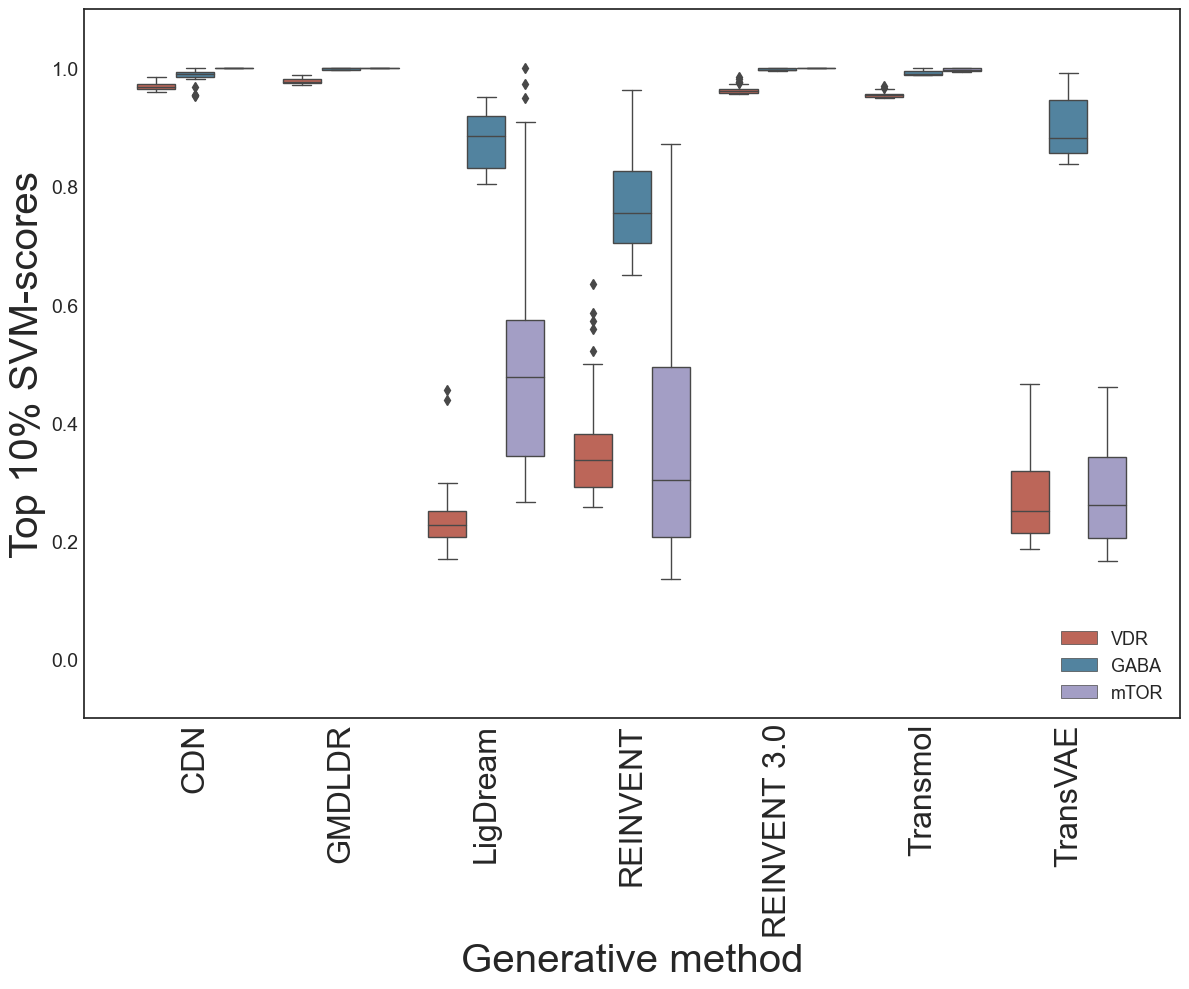

In [53]:
plt.figure(figsize=(12, 10))

plt.style.use('default')
plt.style.use('seaborn-white')
plt.rcParams["font.family"] = "Arial"#"Times New Roman"
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

folder_save = '400-vdr-gaba-mtor-stratified-tokseed-morganfp-noseed-sim-svm-graphdta-mltle/'

# fig, axes = plt.subplots(nrows=1,
#                          ncols=1,
#                          figsize=(12, 12),
#                          sharex=True,
#                          sharey='col')

g = sns.boxplot(data=df,
                 x='Generative method',
                 y='SVM-score',
                 hue='Dataset',
                 palette=palette,
                 linewidth=1,
                 order=['CDN', "GMDLDR", 'LigDream', 'REINVENT', 'REINVENT 3.0',
                'Transmol', 'TransVAE'])

# sns.despine(left=True, bottom=True)


# plt.title('Top 10% SVM-scores', size=20)
plt.ylabel('Top 10% SVM-scores', size=29)
plt.xlabel('Generative method', size=29)
plt.xticks(rotation=90, fontsize=23)

leg = plt.legend(loc="lower right", fontsize=13)
for line in leg.get_lines():
    line.set_linewidth(9)
    
plt.ylim((-0.1, 1.1))
plt.tight_layout()
plt.margins(0, 0)
plt.savefig('bar-box-svm.pdf', dpi=100, bbox_inches='tight')

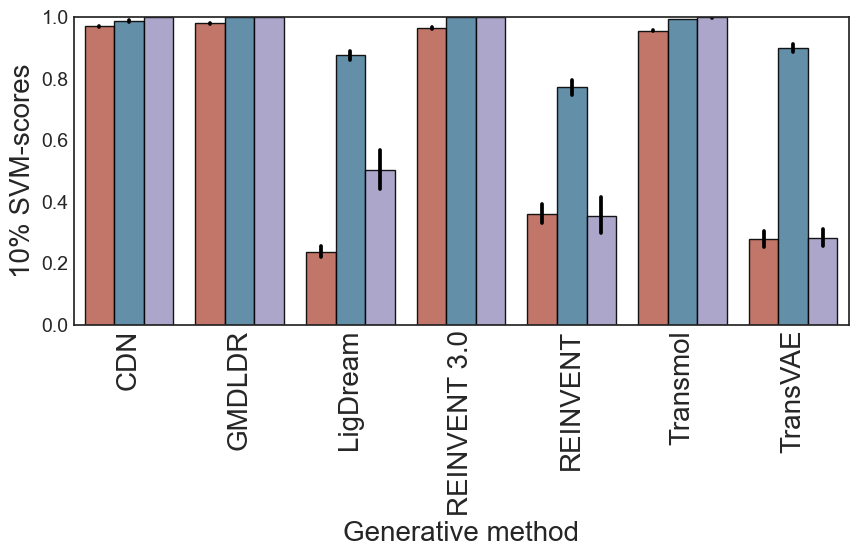

In [54]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=df,
                 x='Generative method',
                 y='SVM-score',
                 hue='Dataset',
                 palette=palette,
                 errcolor='k',
                 linestyle='-',
                 linewidth=1,
                 edgecolor='k',
                 alpha=0.9)
# sns.despine(left=True, bottom=True)
ax.legend_.remove()

plt.ylabel('10% SVM-scores', size=20)
plt.xlabel('Generative method', size=20)
plt.xticks(rotation=90, fontsize=20)

plt.ylim((0, 1))
plt.savefig('barplot.png', dpi=300, bbox_inches='tight')

In [57]:
colors = ["#fef5a7", "#9E7BA5", "#82A57B", "#FEC9A7", "#6A92AD","#aee2c9", "#E2AEC7"]


vdr


gaba


mtor


vdr


gaba


mtor



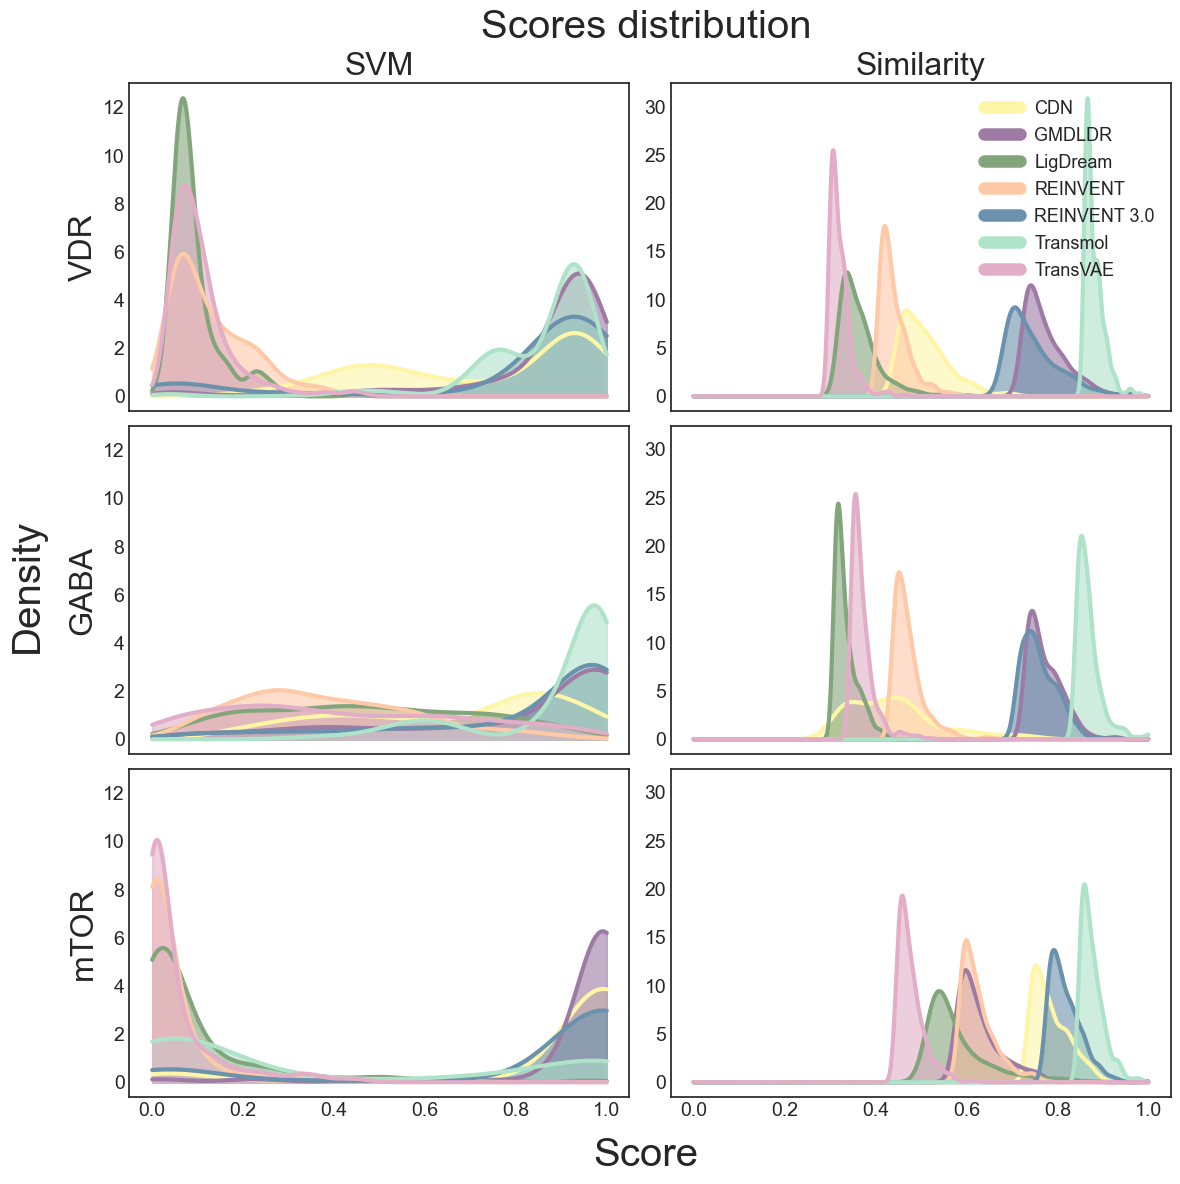

In [58]:
plt.style.use('default')
plt.style.use('seaborn-white')
plt.rcParams["font.family"] = "Arial"
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

folder_save = 'predicted_data/'

fig, axes = plt.subplots(nrows=3,
                         ncols=2,
                         figsize=(12, 12),
                         sharex=True,
                         sharey='col')

for COL, col in zip([0, 1], ['score-svm', 'similarity']):

    for K, target_folder in enumerate(['vdr', 'gaba', 'mtor']):
        print()
        print(target_folder)
        print()

        i = 0
        for k in ['CDN', "GMDLDR", 'LigDream', 'REINVENT', 'REINVENT 3', 'Transmol', 'TransVAE']:

            df = pd.read_csv(folder_save + target_folder + '/' +
                             METHODS_MAP2[k])
            v = df[col]
            xs = np.linspace(0, 1, 1500)
            density = gaussian_kde(v)
            k = METHODS_MAP[k]

            if K == 0 and COL == 1:
                axes[K, COL].plot(xs,
                                  density(xs),
                                  label=k,
                                  alpha=1,
                                  color=colors[i],
                                  linewidth=3)

                axes[K, COL].fill_between(xs,
                                          density(xs),
                                          step="pre",
                                          alpha=0.6,
                                          color=colors[i])
            else:
                axes[K, COL].plot(xs,
                                  density(xs),
                                  alpha=1,
                                  color=colors[i],
                                  linewidth=3)
                axes[K, COL].fill_between(xs,
                                          density(xs),
                                          step="pre",
                                          alpha=0.6,
                                          color=colors[i])
            i += 1

    #sns.despine(left=True, bottom=True)

#plt.ylim((0, 11))

axes[0][0].title.set_text('SVM')
axes[0][0].title.set_size(23)

axes[0][1].title.set_text('Similarity')
axes[0][1].title.set_size(23)

axes[0][0].set_ylabel("VDR", size=23)
axes[1][0].set_ylabel("GABA", size=23)
axes[2][0].set_ylabel("mTOR", size=23)

fig.suptitle(f'Scores distribution', size=29, x=0.55)
fig.supxlabel('Score', size=29, x=0.55)
fig.supylabel(f'Density', size=29)

leg = axes[0][1].legend(loc="upper right", fontsize=13)
for line in leg.get_lines():
    line.set_linewidth(9)

plt.tight_layout()
plt.margins(0, 0)
plt.savefig(f'svm-sim.pdf', dpi=100, bbox_inches='tight')


vdr


gaba


mtor


vdr


gaba


mtor



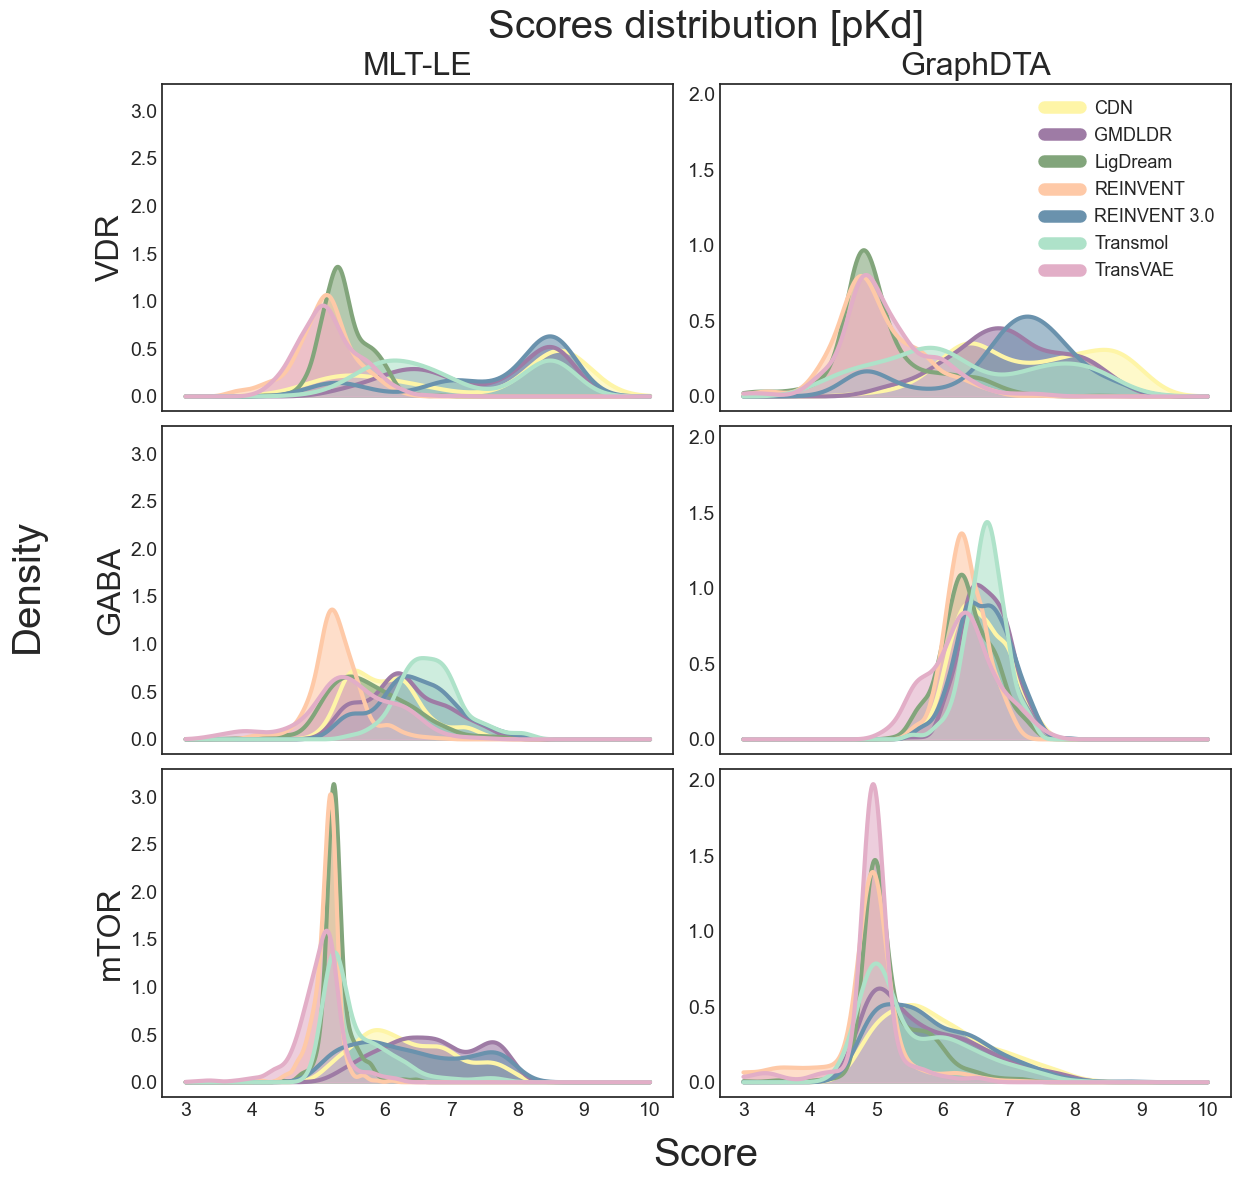

In [61]:
en = True

plt.style.use('default')
plt.style.use('seaborn-white')
plt.rcParams["font.family"] = "Arial"# "Times New Roman"
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

folder_save = 'predicted_data/'

fig, axes = plt.subplots(nrows=3,
                         ncols=2,
                         figsize=(12, 12),
                         sharex=True,
                         sharey='col')

for COL, col in zip([0, 1], ['pKd', 'GCNNet_BindingDB_pKd']):

    for K, target_folder in enumerate(['vdr', 'gaba', 'mtor']):
        print()
        print(target_folder)
        print()

        i = 0
        for k in ['CDN', "GMDLDR", 'LigDream', 'REINVENT', 'REINVENT 3', 'Transmol', 'TransVAE']:

            df = pd.read_csv(folder_save + target_folder + '/' +
                             METHODS_MAP2[k])
            v = df[col]
            xs = np.linspace(3, 10, 1500)
            density = gaussian_kde(v)
            k = METHODS_MAP[k]

            if K == 0 and COL == 1:
                axes[K, COL].plot(xs,
                                  density(xs),
                                  label=k,
                                  alpha=1,
                                  color=colors[i],
                                  linewidth=3)

                axes[K, COL].fill_between(xs,
                                          density(xs),
                                          step="pre",
                                          alpha=0.6,
                                          color=colors[i])
            else:
                axes[K, COL].plot(xs,
                                  density(xs),
                                  alpha=1,
                                  color=colors[i],
                                  linewidth=3)
                axes[K, COL].fill_between(xs,
                                          density(xs),
                                          step="pre",
                                          alpha=0.6,
                                          color=colors[i])
            i += 1

    #sns.despine(left=True, bottom=True)

#plt.ylim((0, 11))

axes[0][0].title.set_text('MLT-LE')
axes[0][0].title.set_size(23)

axes[0][1].title.set_text('GraphDTA')
axes[0][1].title.set_size(23)

axes[0][0].set_ylabel("VDR", size=23)
axes[1][0].set_ylabel("GABA", size=23)
axes[2][0].set_ylabel("mTOR", size=23)

if en:
    fig.suptitle(f'Scores distribution [pKd]', size=29, x=0.55)
    fig.supxlabel('Score', size=29, x=0.55)
    fig.supylabel(f'Density', size=29, x=-0.03)
else:
    fig.suptitle(f'Распределение предсказанных значений [pKd]', size=29, x=0.55)
    fig.supxlabel('Значение', size=29, x=0.55)
    fig.supylabel(f'Плотность', size=29, x=-0.03)
    leg = axes[0][1].legend(loc="upper right", fontsize=18)


leg = axes[0][1].legend(loc="upper right", fontsize=13)
for line in leg.get_lines():
    line.set_linewidth(9)

plt.tight_layout()
plt.margins(0, 0)
plt.savefig(f'dist-graphdta-mltle-scores.pdf', dpi=100, bbox_inches='tight')